In [1]:
%matplotlib ipympl

import glob
import os

import matplotlib.pyplot as plt
import numpy as np

from microhhpy.spatial import Domain, plot_domains
from microhhpy.land import create_land_surface_input, read_corine, plot_corine
from microhhpy.land import ifs_vegetation, ifs_vegetation_cmap

## Realistic heterogeneous land-use
For realistic cases, we provide methods to create land-surface input from:
- [Corine, Europe, 100m resolution](https://land.copernicus.eu/en/products/corine-land-cover)
- [LCC, Global, 100 m resolution](https://land.copernicus.eu/en/products/global-dynamic-land-cover/copernicus-global-land-service-land-cover-100m-collection-3-epoch-2019-globe)
- [LCC, Global 10 m resolution](https://land.copernicus.eu/en/products/global-dynamic-land-cover/land-cover-2020-raster-10-m-global-annual) (Not yet, TODO!)

In [2]:
corine_tiff = '/home/scratch1/bart/Corine/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'
lcc_tiff = '/home/scratch1/bart/LCC/PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif'

In [3]:
"""
Setup domain / projection.
"""
lon = 4.5
lat = 52
proj_str = f'+proj=lcc +lat_1={lat-1} +lat_2={lat+1} +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

dom = Domain(
    xsize = 102400,
    ysize = 102400,
    itot = 512,
    jtot = 512,
    lon = lon,
    lat = lat,
    anchor = 'center',
    proj_str = proj_str)

#plot_domains([dom], use_projection=True)

In [4]:
lu_corine = create_land_surface_input(
    dom.proj.lon,
    dom.proj.lat,
    land_use_source='corine_100m',
    land_use_tiff=corine_tiff,
    save_binaries=True,
    output_dir='.',
    save_netcdf=True,
    netcdf_file='lsm_input_corine.nc',
)

['crops_mixed_farming', 'short_grass', 'evergreen_needleleaf', 'deciduous_needleleaf', 'deciduous_broadleaf', 'evergreen_broadleaf', 'tall_grass', 'desert', 'tundra', 'irrigated_crops', 'semidesert', 'ice_caps_glaciers', 'bogs_marshes', 'inland_water', 'ocean', 'evergreen_shrubs', 'deciduous_shrubs', 'mixed_forest_wood', 'interrupted_forest', 'water_land_mixtures', 'urban']


[2025/08/11 16:51:54] [microhhpy] [DEBUG] Saving ./lsm_input_corine.nc'
[2025/08/11 16:51:54] [microhhpy] [DEBUG] Saving land-surface binaries in .'
[2025/08/11 16:51:54] [microhhpy] [WARNING] Uninitialised land-surface fields: root_frac'


/tmp/ipykernel_763727/4166753915.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lu_corine.lon, lu_corine.lat, lu_corine.ds.index_veg, vmin=0, vmax=20, cmap=ifs_vegetation_cmap)


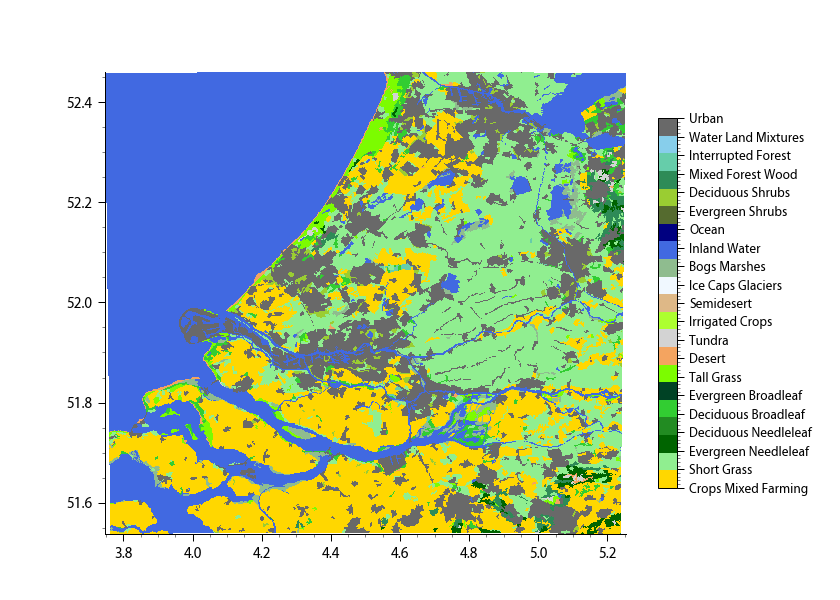

In [5]:
names = ifs_vegetation.ifs_vegetation['name']

plt.figure()
plt.pcolormesh(lu_corine.lon, lu_corine.lat, lu_corine.ds.index_veg, vmin=0, vmax=20, cmap=ifs_vegetation_cmap)
cbar = plt.colorbar(shrink=0.8)
cbar.set_ticks(range(21))
cbar.set_ticklabels([veg_type.replace('_', ' ').title() for veg_type in names])
cbar.ax.tick_params(labelsize=8)